# 36. FUZZYX: KMEANS CLUSTERING
---

## 1. Introducing the Data

Source: Daniel Graves, Witold Pedrycz, Kernel-based fuzzy clustering
and fuzzy clustering: A comparative experimental study,
Fuzzy Sets and Systems 161(4), 2010, 522-543

One of the "synthetic data sets" from the above-mentioned paper.

Labels generated by A. Cena and M. Gagolewski.
`0` denotes the noise class (if present).

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

cols = ['col1', 'col2']
fuzzyx = pd.read_csv('data/fuzzyx.data.gz', delimiter=" ",  header=None)
labels = pd.read_csv('data/fuzzyx.labels5.gz', header=None)
fuzzyx.columns = cols
fuzzyx['labels'] = labels
print(fuzzyx.shape)
fuzzyx.head()

(1000, 3)


,col1,col2,labels
0,-0.002,-0.035,4
1,-0.064,0.056,4
2,-0.060,0.003,4
3,0.093,0.009,4
4,0.080,-0.097,4


In [2]:
labels.value_counts()

1    314
2    245
3    226
4    215
dtype: int64

## 2. Data Visualization

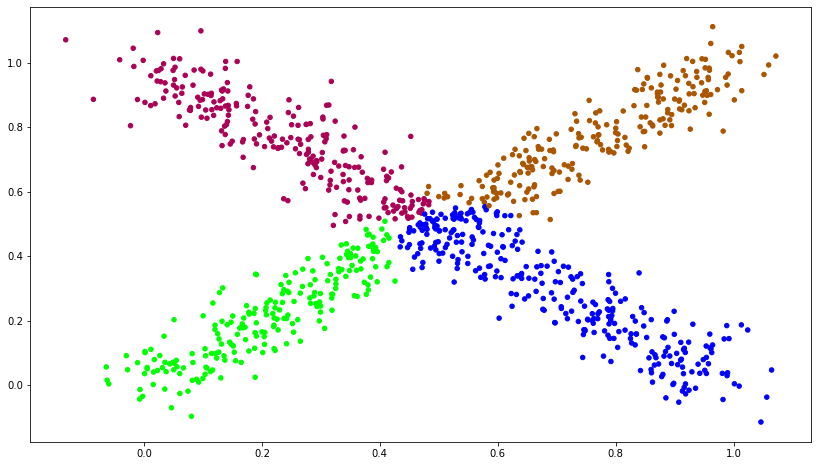

In [3]:
import matplotlib.pyplot as plt

X = fuzzyx[cols]
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=labels, 
           cmap=plt.cm.brg, s=20)
plt.show()

## 3. The Elbow Method

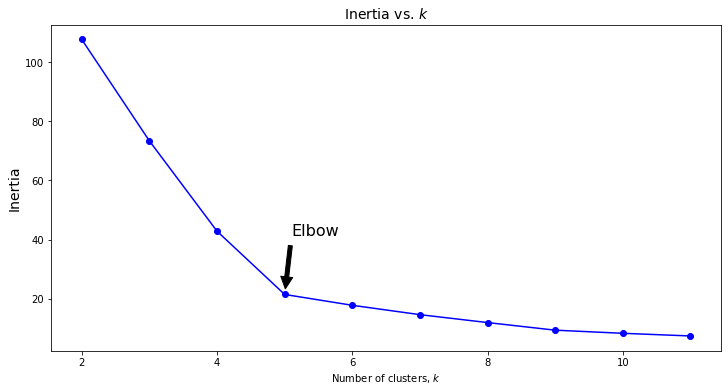

In [4]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(2, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(5, inertias[3]),
             xytext=(0.40, 0.40),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 4. The Silhouette Score Method

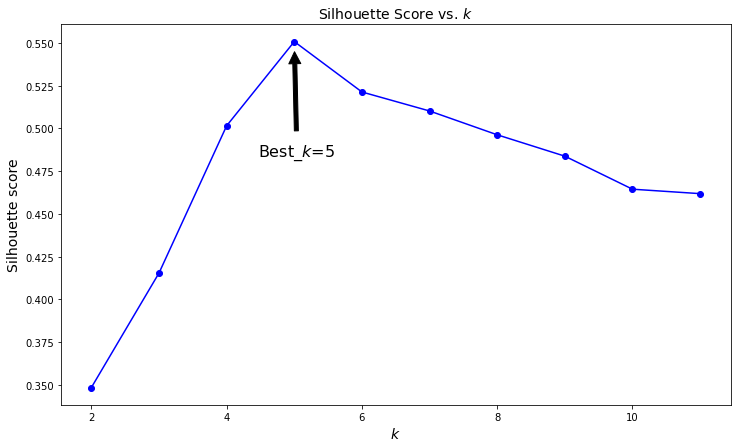

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) 
                     for model in kmeans_per_k]

plt.figure(figsize=(12, 7))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.title('Silhouette Score vs. $k$', fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Best_$k$=5',
             xy=(5, silhouette_scores[3]),
             xytext=(0.35, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 5. Silhouette Analysis for KMeans Clustering

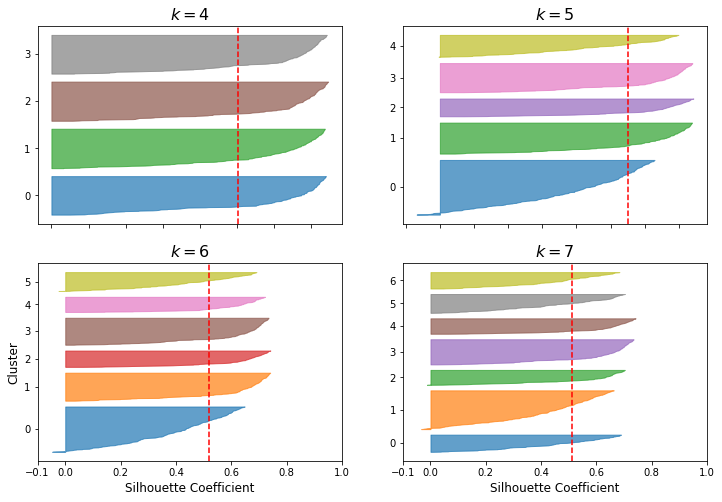

In [6]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(12, 8))

for k in (4, 5, 6, 7):
    plt.subplot(2, 2, k - 3)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6):
        plt.ylabel("Cluster", fontsize=12)
    
    if k in (6, 7):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## 6. KMeans Clustering at k=4 and k=5

In [7]:
kmeans4 = KMeans(n_clusters=4)
y_pred4 = kmeans4.fit_predict(X)
np.unique(y_pred4, return_counts=True)

(array([0, 1, 2, 3]), array([184, 194, 215, 407], dtype=int64))

In [8]:
kmeans5 = KMeans(n_clusters=5)
y_pred5 = kmeans5.fit_predict(X)
np.unique(y_pred5, return_counts=True)

(array([0, 1, 2, 3, 4]), array([169, 332, 166, 165, 168], dtype=int64))

## 7. Evaluating KMeans Performance

#### k=4 (because we have 4 labels)

In [9]:
from sklearn import metrics

y_true = fuzzyx['labels']
metrics.adjusted_rand_score(y_true, y_pred4)

0.5924729706593699

In [10]:
metrics.adjusted_rand_score(y_pred4, y_true)

0.5924729706593699

In [11]:
metrics.adjusted_mutual_info_score(y_true, y_pred4)

0.7020365671529539

In [12]:
metrics.normalized_mutual_info_score(y_true, y_pred4)  

0.7030342307789001

In [13]:
metrics.homogeneity_score(y_true, y_pred4)

0.6905216837938256

In [14]:
metrics.completeness_score(y_true, y_pred4)

0.7160086117527926

In [15]:
metrics.v_measure_score(y_true, y_pred4)

0.7030342307789001

In [16]:
metrics.homogeneity_completeness_v_measure(y_true, y_pred4)

(0.6905216837938256, 0.7160086117527926, 0.7030342307789001)

#### k=5 (because it's the best k)

In [17]:
metrics.adjusted_rand_score(y_true, y_pred5)

0.4817189951550664

In [18]:
metrics.adjusted_rand_score(y_pred5, y_true)

0.4817189951550664

In [19]:
metrics.adjusted_mutual_info_score(y_true, y_pred5)

0.6427041795621831

In [20]:
metrics.normalized_mutual_info_score(y_true, y_pred5)  

0.6441724783110053

In [21]:
metrics.homogeneity_completeness_v_measure(y_true, y_pred5)

(0.6879067326725864, 0.6056667035957516, 0.6441724783110053)

## 8. Visualizing Predicted Clusters

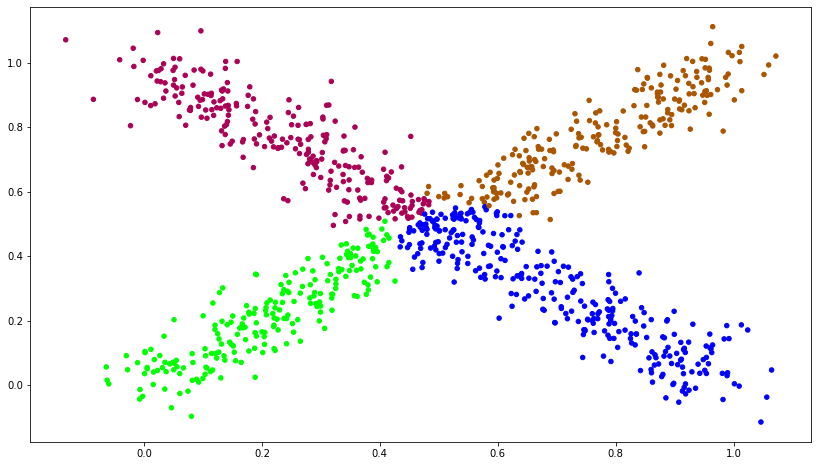

In [22]:
# the labels
X = fuzzyx[cols]
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=labels, 
           cmap=plt.cm.brg, s=20)
plt.show()

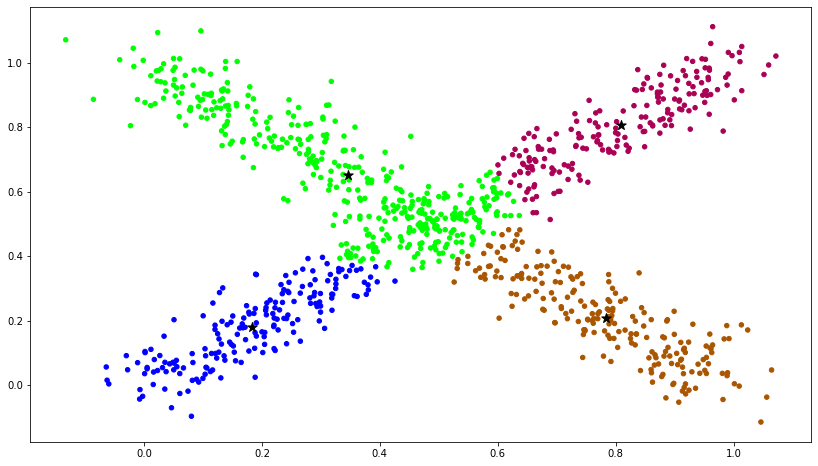

In [23]:
# at k=4
X = fuzzyx[cols]
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=y_pred4, 
           cmap=plt.cm.brg, s=20)
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], 
           s = 100, c = 'k', marker='*')
plt.show()

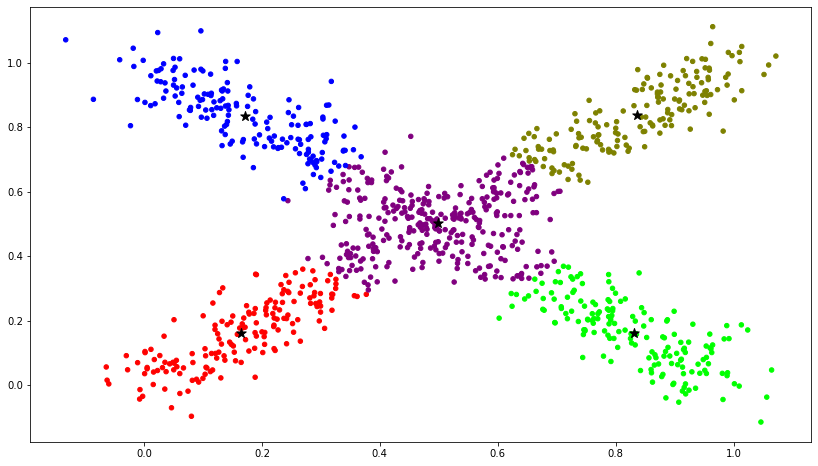

In [24]:
# at k=5
X = fuzzyx[cols]
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=y_pred5, 
           cmap=plt.cm.brg, s=20)
plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], 
           s = 100, c = 'k', marker='*')
plt.show()

In [25]:
fuzzyx['kmeans4'] = y_pred4
fuzzyx['kmeans5'] = y_pred5

fuzzyx.to_csv('data/fuzzyx_df', index=False)

Done!